In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
auto_mpg_data = pd.read_csv('auto_mpg_data_ml.csv')
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,USA,Europe,...,opel,peugeot,plymouth,pontiac,renault,saab,subaru,toyota,triumph,volvo
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevelle malibu,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,skylark 320,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,satellite,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,rebel sst,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,torino,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
features = [column for column in auto_mpg_data.columns if column not in ['mpg', 'car_name', 'company_name']]
features_second = ['cylinders','displacement','horsepower','acceleration','weight','USA','Europe', 'Japan','model_year']
X = auto_mpg_data[features_second]
Y = auto_mpg_data['mpg']

In [14]:
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.3,random_state=324)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
print(rmse)

3.197731939562272


In [20]:
gb_regressor = GradientBoostingRegressor(n_estimators=5000)
gb_regressor.fit(X_train,y_train)
y_predicted_gbr = gb_regressor.predict(X_test)
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.6550486574556764

<AxesSubplot:>

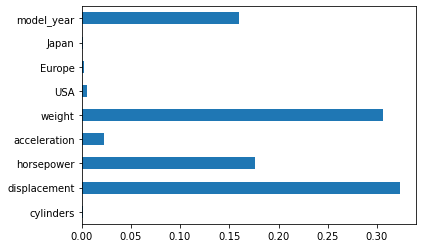

In [21]:
fi= pd.Series(gb_regressor.feature_importances_,index=features_second)
fi.plot.barh()

In [22]:
for importance, feature in zip(gb_regressor.feature_importances_, features):
    print(feature, importance)

cylinders 0.001407406275221898
displacement 0.32383256909241975
horsepower 0.1762586193405101
weight 0.022926106304149506
acceleration 0.3058978671614645
model_year 0.005377127956989646
USA 0.0024097534915340823
Europe 0.0018190833569783477
Japan 0.16007146702073213
